# Results of Exploratory Data Analysis on ACP, AMP, and DBP datasets

Importing libraries for data loading and visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys  
sys.path.insert(0, '../scripts')

import eda_utils as eda

%matplotlib inline

Allow multiple outputs from each cell

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Loading in Datasets and Normalized Cross Similarity Score Matrices

In [5]:
# Loading in original datasets expanded with protein analysis columns
df_train_acp = pd.read_csv("../data/acp/train_expanded.csv")
df_test_acp = pd.read_csv("../data/acp/test_expanded.csv")
df_full_amp = pd.read_csv("../data/amp/all_data_expanded.csv")
df_train_dbp = pd.read_csv("../data/dna_binding/train_expanded.csv")
df_test_dbp = pd.read_csv("../data/dna_binding/test_expanded.csv")

# Loading in cross similarity score matrices for each dataset (DBP matrices were created from a subset of the sequences)
norm_cross_tr_acp = pd.read_csv("../data/acp/train_cross_similarity_norm.csv")
norm_cross_t_acp = pd.read_csv("../data/acp/test_cross_similarity_norm.csv")
norm_cross_amp = pd.read_csv("../data/amp/all_cross_similarity_norm.csv")
norm_cross_tr_dbp = pd.read_csv("../data/dna_binding/train_cross_similarity_norm.csv")
norm_cross_t_dbp = pd.read_csv("../data/dna_binding/test_cross_similarity_norm.csv")

## Dataset Sizes

| ACP | AMP | DBP |
| --- | --- | --- |
| Train: 1378 (80%) | All: 4042 (100%) | Train: 14189 (86%) |
| Test: 344 (20%) |  | Test: 2272 (14%) |

All the datasets are perfectly balanced between each of the two classes.

Note: Only the AMP dataset was not previously split into train and test sets. Also, the total amount of samples for the DBP Train set was 14016 after removing duplicates.

## Dataset columns/features


| ACP | AMP | DBP |
| --- | --- | --- |
| `sequences`, `label` | `PDBs_code`, `SequenceID`, `label` | `code`, `sequence`, `label`, `origin` |

The `PDBs_code` column in the AMP dataset and `code` column in the DBP dataset both refer to the same type of universal protein identifier. The `origin` column in DBP has only unique value, which is a link to the [source](https://github.com/hfuulgb/PDB-Fusion/tree/main/DNA) of the DBP and non-DBP protein sequences, in FASTA format.

## Sequence Sizes

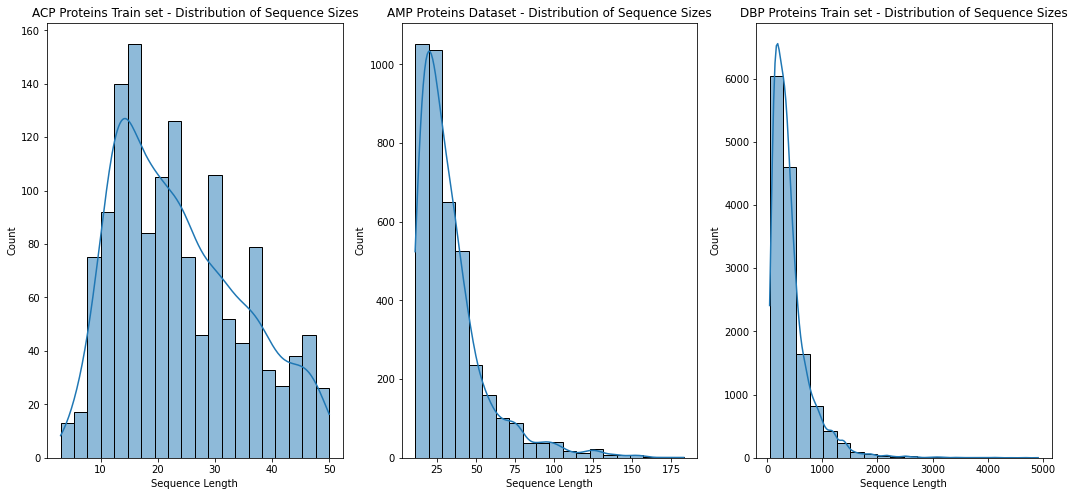

In [6]:
plt.figure(figsize=(18,8))

ax1 = plt.subplot(131)
sns.histplot(df_train_acp.sequences.str.len(), bins=20, kde=True).set(
                title='ACP Proteins Train set - Distribution of Sequence Sizes');
ax1.set(xlabel='Sequence Length', ylabel='Count');


ax1 = plt.subplot(132)
sns.histplot(df_full_amp.SequenceID.str.len(), bins=20, kde=True).set(
                title='AMP Proteins Dataset - Distribution of Sequence Sizes');
ax1.set(xlabel='Sequence Length', ylabel='Count');


ax1 = plt.subplot(133)
sns.histplot(df_train_dbp.sequence.str.len(), bins=20, kde=True).set(
                title='DBP Proteins Train set - Distribution of Sequence Sizes');
ax1.set(xlabel='Sequence Length', ylabel='Count');

In [7]:
print(f"ACP Train dataset - mean of sequence sizes: {df_train_acp.sequences.str.len().mean()}")
print(f"AMP Full dataset - mean of sequence sizes: {df_full_amp.SequenceID.str.len().mean()}")
print(f"DBP Train dataset - mean of sequence sizes: {df_train_dbp.sequence.str.len().mean()}")

print(f"ACP Train dataset - smallest sequence size: {df_train_acp.sequences.str.len().min()}")
print(f"AMP Full dataset - smallest sequence size: {df_full_amp.SequenceID.str.len().min()}")
print(f"DBP Train dataset - smallest sequence size: {df_train_dbp.sequence.str.len().min()}")

print(f"ACP Train dataset - largest sequence size: {df_train_acp.sequences.str.len().max()}")
print(f"AMP Full dataset - largest sequence size: {df_full_amp.SequenceID.str.len().max()}")
print(f"DBP Train dataset - largest sequence size: {df_train_dbp.sequence.str.len().max()}")

ACP Train dataset - mean of sequence sizes: 23.826560232220608
AMP Full dataset - mean of sequence sizes: 34.00247402276101
DBP Train dataset - mean of sequence sizes: 427.5094891552511
ACP Train dataset - smallest sequence size: 3
AMP Full dataset - smallest sequence size: 11
DBP Train dataset - smallest sequence size: 47
ACP Train dataset - largest sequence size: 50
AMP Full dataset - largest sequence size: 183
DBP Train dataset - largest sequence size: 4911


As seen above, the ACP dataset tends to have the smallest proteins, whereas the DBP dataset tends to have the largest proteins, by up to two orders of magnitude. 

Note: the distributions and summary statistics shown above are very similar in both the train and test sets, which is why only the train set results are shown.

#### Difference in Sequence Sizes between Positive and Negative Classes

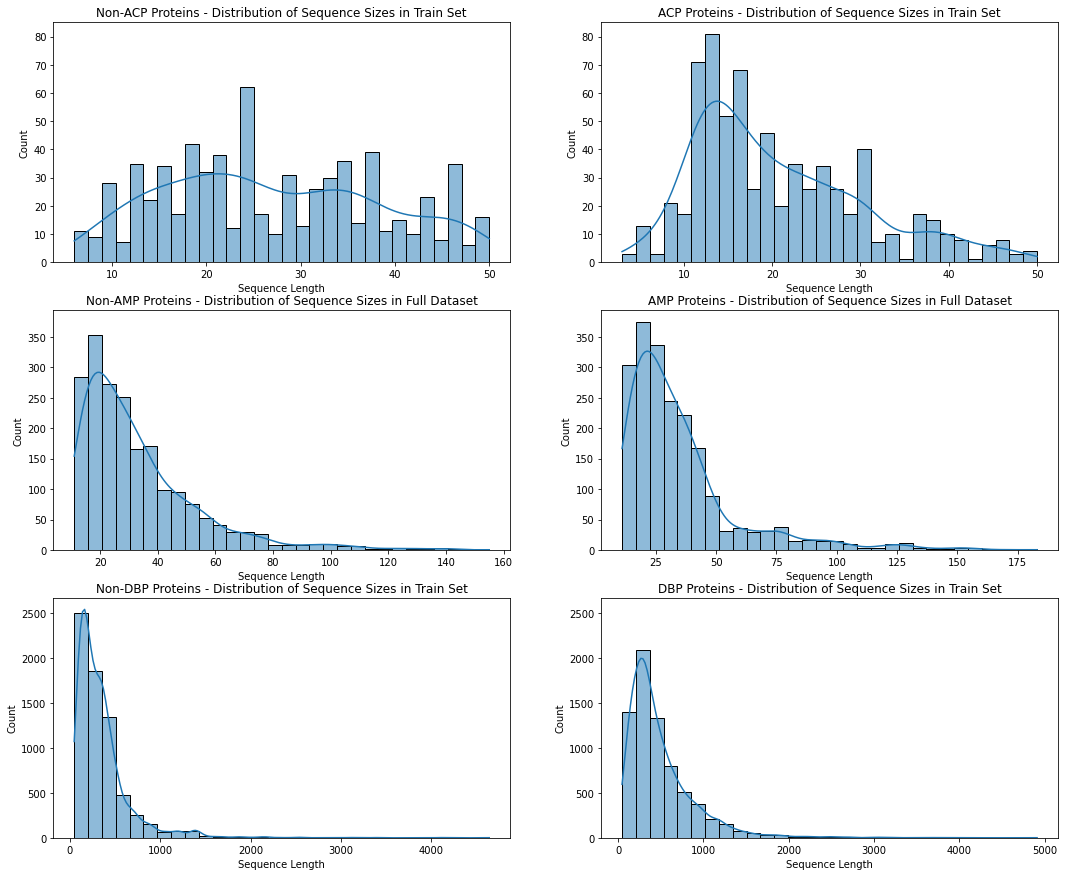

In [8]:
plt.figure(figsize=(18,15))

# ACP Dataset
ax1 = plt.subplot(321)
sns.histplot(df_train_acp[df_train_acp.label==0].sequences.str.len(), bins=30, kde=True).set(
                title='Non-ACP Proteins - Distribution of Sequence Sizes in Train Set');
ax1.set(xlabel='Sequence Length', ylabel='Count');

ax2 = plt.subplot(322, sharey=ax1)
sns.histplot(df_train_acp[df_train_acp.label==1].sequences.str.len(), bins=30, kde=True).set(
                title='ACP Proteins - Distribution of Sequence Sizes in Train Set');
ax2.set(xlabel='Sequence Length', ylabel='Count');

# AMP Dataset
ax3 = plt.subplot(323)
sns.histplot(df_full_amp[df_full_amp.label==0].SequenceID.str.len(), bins=30, kde=True).set(
                title='Non-AMP Proteins - Distribution of Sequence Sizes in Full Dataset');
ax3.set(xlabel='Sequence Length', ylabel='Count');

ax4 = plt.subplot(324, sharey=ax3)
sns.histplot(df_full_amp[df_full_amp.label==1].SequenceID.str.len(), bins=30, kde=True).set(
                title='AMP Proteins - Distribution of Sequence Sizes in Full Dataset');
ax4.set(xlabel='Sequence Length', ylabel='Count');

# DBP Dataset
ax5 = plt.subplot(325)
sns.histplot(df_train_dbp[df_train_dbp.label==0].sequence.str.len(), bins=30, kde=True).set(
                title='Non-DBP Proteins - Distribution of Sequence Sizes in Train Set');
ax5.set(xlabel='Sequence Length', ylabel='Count');

ax6 = plt.subplot(326, sharey=ax5)
sns.histplot(df_train_dbp[df_train_dbp.label==1].sequence.str.len(), bins=30, kde=True).set(
                title='DBP Proteins - Distribution of Sequence Sizes in Train Set');
ax6.set(xlabel='Sequence Length', ylabel='Count');

In [9]:
# ACP Dataset
summary_df = pd.concat([df_train_acp.length, df_train_acp.label], axis=1).groupby("label").agg(['mean', 'min', 'max'])
summary_df.columns = summary_df.columns.set_levels(['ACP - Train set sequences'],level=0)

summary_df2 = pd.concat([df_test_acp.length, df_test_acp.label], axis=1).groupby("label").agg(['mean', 'min', 'max'])
summary_df2.columns = summary_df2.columns.set_levels(['ACP - Test set sequences'],level=0)
summary_df = pd.concat([summary_df, summary_df2], axis=1)
summary_df.head()

# AMP Dataset
summary_df = pd.concat([df_full_amp.length, df_full_amp.label], axis=1).groupby("label").agg(['mean', 'min', 'max'])
summary_df.columns = summary_df.columns.set_levels(['AMP - Full Dataset sequences'],level=0)
summary_df.head()

# DBP Dataset
summary_df = pd.concat([df_train_dbp.length, df_train_dbp.label], axis=1).groupby("label").agg(['mean', 'min', 'max'])
summary_df.columns = summary_df.columns.set_levels(['DBP - Train set sequences'],level=0)

summary_df2 = pd.concat([df_test_dbp.length, df_test_dbp.label], axis=1).groupby("label").agg(['mean', 'min', 'max'])
summary_df2.columns = summary_df2.columns.set_levels(['DBP - Test set sequences'],level=0)
summary_df = pd.concat([summary_df, summary_df2], axis=1)
summary_df.head()


ACP - Train set sequences         ACP - Test set sequences        
                           mean min max                     mean min max
label                                                                   
0                     26.969521   6  50                26.720930   2  50
1                     20.683599   3  50                20.796512   4  48

AMP - Full Dataset sequences         
                              mean min  max
label                                      
0                        33.029193  11  155
1                        34.975755  11  183

DBP - Train set sequences           DBP - Test set sequences          
                           mean min   max                     mean min   max
label                                                                       
0                    353.723973  51  4639               374.881144  51  5183
1                    498.790293  47  4911               542.570685  51  4911

Length seems to be a feature with potentially high predictive power for our classifiers, particularly for the ACP and DBP classifiers, and less so for the AMP classifier.

## Duplicated Sequences


| ACP | AMP | DBP |
| --- | --- | --- |
| 0 | 0 | 173 |

The DBP Train Dataset is the only dataset that has duplicated sequences, specifically 173 instances of duplicated sequences. All of these duplicates have different codes despite sharing the same sequence. Interestingly, all of the duplicated sequences were from the negative class - non-dna-binding proteins.

## Distribution of Positive and Negative Classes in each Dataset

Each dataset is perfectly balanced between the positive and negative classes, apart from the DBP dataset, which is almost perfectly balanced.

<table>
  <tr>
    <td></td>
    <td colspan="2">ACP</td>
    <td colspan="2">AMP</td>
    <td colspan="2">DBP</td>
  </tr>
  <tr>
    <td>Label</td>
    <td>Train</td>
    <td>Test</td>
    <td>Full</td>
    <td>Train</td>
    <td>Test</td>
  </tr>
  <tr>
    <td>0</td>
    <td>689</td>
    <td>172</td>
    <td>2021</td>
    <td>6887</td>
    <td>1119</td>
  </tr>
  <tr>
    <td>1</td>
    <td>689</td>
    <td>172</td>
    <td>2021</td>
    <td>7129</td>
    <td>1153</td>
  </tr>
</table>

## Alternate Amino Acid Codes present in Sequences

In [10]:
amino_acids_acp = set()
for protein in df_train_acp.sequences:
    for acid in protein:
        amino_acids_acp.add(acid)
for protein in df_test_acp.sequences:
    for acid in protein:
        amino_acids_acp.add(acid)
print(f"Natural Amino Acids: {sorted(amino_acids_acp)}")
print(f"Number of amino acid symbols used in ACP dataset: {len(amino_acids_acp)}")

Natural Amino Acids: ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
Number of amino acid symbols used in ACP dataset: 20


The sequences from the ACP dataset, as shown above, only use the 20 natural amino acids: listed [here](https://www.cryst.bbk.ac.uk/education/AminoAcid/the_twenty.html).

In [11]:
amino_acids_amp = set()
for protein in df_full_amp.SequenceID:
    for acid in protein:
        amino_acids_amp.add(acid)
print(f"Extra amino acid symbol used: {amino_acids_amp.difference(amino_acids_acp)}")
print(f"Number of amino acid symbols used in AMP dataset: {len(amino_acids_amp)}")

Extra amino acid symbol used: {'X'}
Number of amino acid symbols used in AMP dataset: 21


In [12]:
amino_acids_dbp = set()
for protein in df_train_dbp.sequence:
    for acid in protein:
        amino_acids_dbp.add(acid)
for protein in df_test_dbp.sequence:
    for acid in protein:
        amino_acids_dbp.add(acid)
print(f"Extra amino acid symbol used: {amino_acids_dbp.difference(amino_acids_acp)}")
print(f"Number of amino acid symbols used in AMP dataset: {len(amino_acids_dbp)}")

Extra amino acid symbol used: {'B', 'U', 'O', 'X'}
Number of amino acid symbols used in AMP dataset: 24


The sequences in the AMP dataset also include an extra symbol besides these 20 amino acids, `X`, which denotes an unknown amino acid.

The DBP sequences make use of not only `X` but also:

`O`: Asparagine ('N') or Aspartic Acid ('D');

`B`: Pyrrolysine;

`U`: Selenocysteine;

Note: in the original DBP dataset, there was an instance of a typo in the test set: a lowercase `v` which should have been uppercase to denote Valine.

<div align="center">
<b>Number of Occurences of X, O, B, and U in each Dataset</b>
<table>
  <tr>
    <td></td>
    <td colspan="2", align="center"><b>ACP</b></td>
    <td align="center"><b>AMP</b></td>
    <td colspan="2", align="center"><b>DBP</b></td>
  </tr>
  <tr>
    <td align="center"><b>Code</b></td>
    <td align="center"><b>Train</b></td>
    <td align="center"><b>Test</b></td>
    <td align="center"><b>Full</b></td>
    <td align="center"><b>Train</b></td>
    <td align="center"><b>Test</b></td>
  </tr>
  <tr>
    <td align="center"><b>X</b></td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">4 (<i>2 sequences</i>)</td>
    <td align="center">116 (<i>39 sequences</i>)</td>
    <td align="center">0</td>
  </tr>
  <tr>
    <td align="center"><b>O</b></td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">1 (<i>1 sequence</i>)</td>
    <td align="center">0</td>
  </tr>
  <tr>
    <td align="center"><b>B</b></td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">1 (<i>1 sequence</i>)</td>
    <td align="center">0</td>
  </tr>
  <tr>
    <td align="center"><b>U</b></td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">0</td>
    <td align="center">3 (<i>3 sequences</i>)</td>
    <td align="center">0</td>
  </tr>
</table>
</div>

## Feature Engineering

For the purpose of feature engineering, we made use of the BioPython library and its ProteinAnalysis functions:
 
`amino_acid_count`: provides a dictionary for each sequence with a count of each amino acid

`amino_acid_percent`: provides a dictionary for each sequence with the percentage of the count of each amino acid with respect to total length

`aromaticity`: calculates the relative frequency of Phe+Trp+Tyr (more aromatic molecules are stabler)                   

`isoelectric_point`: calculates the pH required of a solution for the net charge of the protein to become zero    

`charge_at_pH`: calculates the charge of the protein at a given pH (we chose the average human body pH of 7.4)    

`molecular_weight`: calculates weight of the protein, measured in Daltons                

`instability_index`: calculates the probable instability of a molecule in a test tube (<40 is most likely stable, whereas >40 is most likely unstable)             

`flexibility`: calculates the flexibility of the protein, which is vital to protein function and molecular interactions

`gravy`: calculates the gravy score of the protein, an indicator of its hydrophobicity (proteins with scores >0 are more likely to be hydrophobic)                    

`secondary_structure_fraction`: calculates the fraction of amino acids which tend to be in a Helix, Turn, or Sheet formation       
            
`molar_extinction_coefficient`: calculates the MEC, a measure of how strongly a chemical species or substance absorbs light at a particular wavelength

Note: these functions deal with the alternate codes `X`, `B`, `O`, and `U` differently. (Check eda_utils script in [scripts folder](https://github.com/MichalRoztocki/Protein-Language-Capstone/tree/main/scripts) for more information).

In [13]:
# Example of the protein features of a random sequence
df_train_acp.loc[42]

sequences                                                FLGALFKVASKVLPSVKCAITKKC
label                                                                           1
length                                                                         24
amino_acid_count                {'A': 3, 'C': 2, 'D': 0, 'E': 0, 'F': 2, 'G': ...
amino_acid_percent              {'A': 12.5, 'C': 8.333333333333332, 'D': 0.0, ...
aromaticity                                                              0.083333
isoelectric_point                                                        9.904294
charge_at_pH                                                             4.495918
molecular_weight                                                        2552.1923
instability_index                                                        7.558333
flexibility                                                              0.995433
gravy                                                                      0.8625
helix_frac      

## Amino Acid Frequencies/Composition

In [14]:
# Getting average count of amino acids for each label in each dataset
acp_avg_acids = eda.get_avg_amino_acid_count(df_train_acp[df_train_acp.label==1], amino_acids_acp)
non_acp_avg_acids = eda.get_avg_amino_acid_count(df_train_acp[df_train_acp.label==0], amino_acids_acp)

amp_avg_acids = eda.get_avg_amino_acid_count(df_full_amp[df_full_amp.label==1], amino_acids_amp)
non_amp_avg_acids = eda.get_avg_amino_acid_count(df_full_amp[df_full_amp.label==0], amino_acids_amp)

dbp_avg_acids = eda.get_avg_amino_acid_count(df_train_dbp[df_train_dbp.label==1], amino_acids_dbp)
non_dbp_avg_acids = eda.get_avg_amino_acid_count(df_train_dbp[df_train_dbp.label==0], amino_acids_dbp)

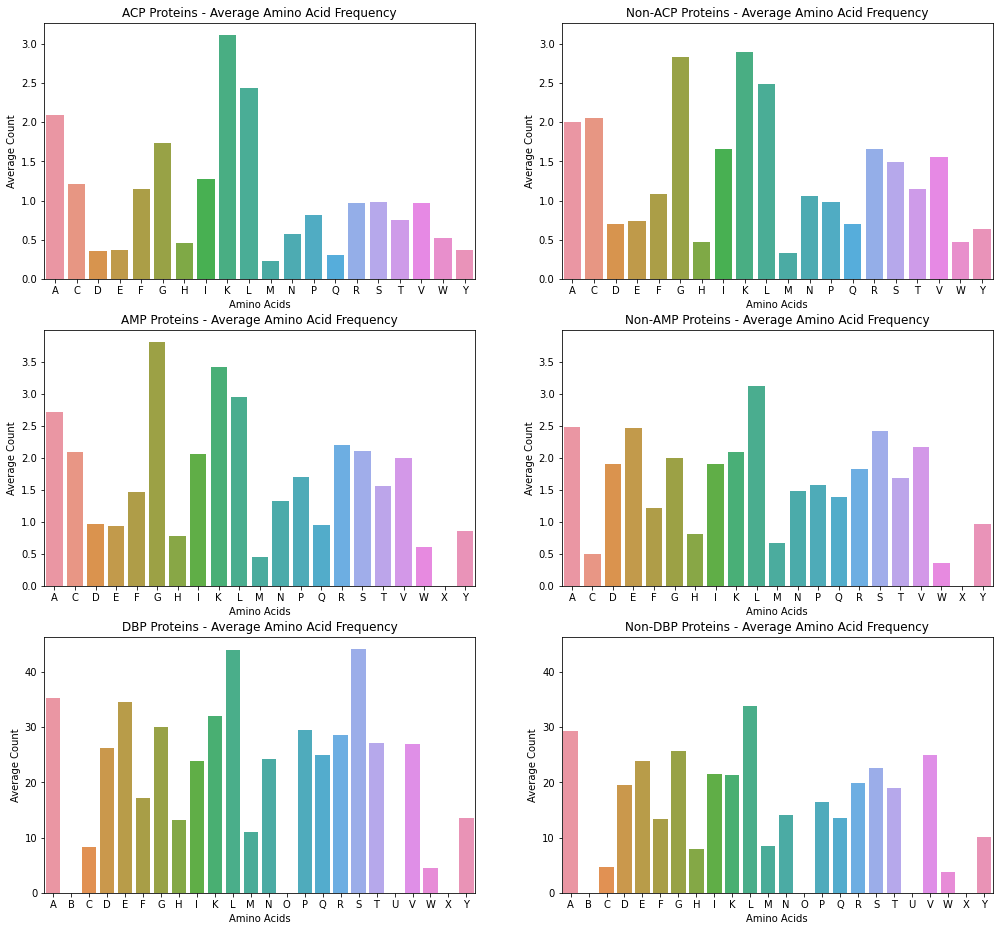

In [18]:
plt.figure(figsize=(17,16))

ax1 = plt.subplot(321)
sns.barplot(x = sorted(acp_avg_acids.keys()), 
            y = [acp_avg_acids.get(key) for key in sorted(acp_avg_acids.keys())]).set(
                title='ACP Proteins - Average Amino Acid Frequency');
ax1.set(xlabel='Amino Acids', ylabel='Average Count');

ax2 = plt.subplot(322, sharey=ax1)
sns.barplot(x = sorted(non_acp_avg_acids.keys()), 
            y = [non_acp_avg_acids.get(key) for key in sorted(non_acp_avg_acids.keys())]).set(
                title='Non-ACP Proteins - Average Amino Acid Frequency');
ax2.set(xlabel='Amino Acids', ylabel='Average Count');

ax3 = plt.subplot(323)
sns.barplot(x = sorted(amp_avg_acids.keys()), 
            y = [amp_avg_acids.get(key) for key in sorted(amp_avg_acids.keys())]).set(
                title='AMP Proteins - Average Amino Acid Frequency');
ax3.set(xlabel='Amino Acids', ylabel='Average Count');

ax4 = plt.subplot(324, sharey=ax3)
sns.barplot(x = sorted(non_amp_avg_acids.keys()), 
            y = [non_amp_avg_acids.get(key) for key in sorted(non_amp_avg_acids.keys())]).set(
                title='Non-AMP Proteins - Average Amino Acid Frequency');
ax4.set(xlabel='Amino Acids', ylabel='Average Count');

ax5 = plt.subplot(325)
sns.barplot(x = sorted(dbp_avg_acids.keys()), 
            y = [dbp_avg_acids.get(key) for key in sorted(dbp_avg_acids.keys())]).set(
                title='DBP Proteins - Average Amino Acid Frequency');
ax5.set(xlabel='Amino Acids', ylabel='Average Count');

ax6 = plt.subplot(326, sharey=ax5)
sns.barplot(x = sorted(non_dbp_avg_acids.keys()), 
            y = [non_dbp_avg_acids.get(key) for key in sorted(non_dbp_avg_acids.keys())]).set(
                title='Non-DBP Proteins - Average Amino Acid Frequency');
ax6.set(xlabel='Amino Acids', ylabel='Average Count');